In [26]:
from fileinput import filename
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [27]:
data=pd.read_csv('D:/abhipraja/codes/dataset/breast-cancer-wisconsin.csv',header=None)

In [28]:
data.shape

(699, 11)

In [29]:
data.corr()

,0,1,2,3,4,5,7,8,9,10
0,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
1,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
2,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
3,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
4,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
5,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
7,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
8,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
9,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
10,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [30]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
colNames=['Id','Clump_thickness','Uniformity_Cell_Seize','Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
data.columns=colNames
data.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Seize',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [32]:
data.head()

,Id,Clump_thickness,Uniformity_Cell_Seize,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [33]:
data.drop('Id',axis=1,inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Seize        699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [35]:
for var in data.columns:
    print(data[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Seize, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10    

In [36]:
data['Bare_Nuclei']=pd.to_numeric(data['Bare_Nuclei'],errors='coerce')

In [37]:
data.dtypes

Clump_thickness                  int64
Uniformity_Cell_Seize            int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [38]:
data.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Seize           0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [39]:
data.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Seize           0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [40]:
data['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [41]:
data['Bare_Nuclei'].isna().sum()

16

In [42]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [43]:
data['Class'].value_counts()/np.float(len(data))

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [44]:
print(round(data.describe(),2))

       Clump_thickness  Uniformity_Cell_Seize  Uniformity_Cell_Shape  \
count           699.00                 699.00                 699.00   
mean              4.42                   3.13                   3.21   
std               2.82                   3.05                   2.97   
min               1.00                   1.00                   1.00   
25%               2.00                   1.00                   1.00   
50%               4.00                   1.00                   1.00   
75%               6.00                   5.00                   5.00   
max              10.00                  10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
2

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

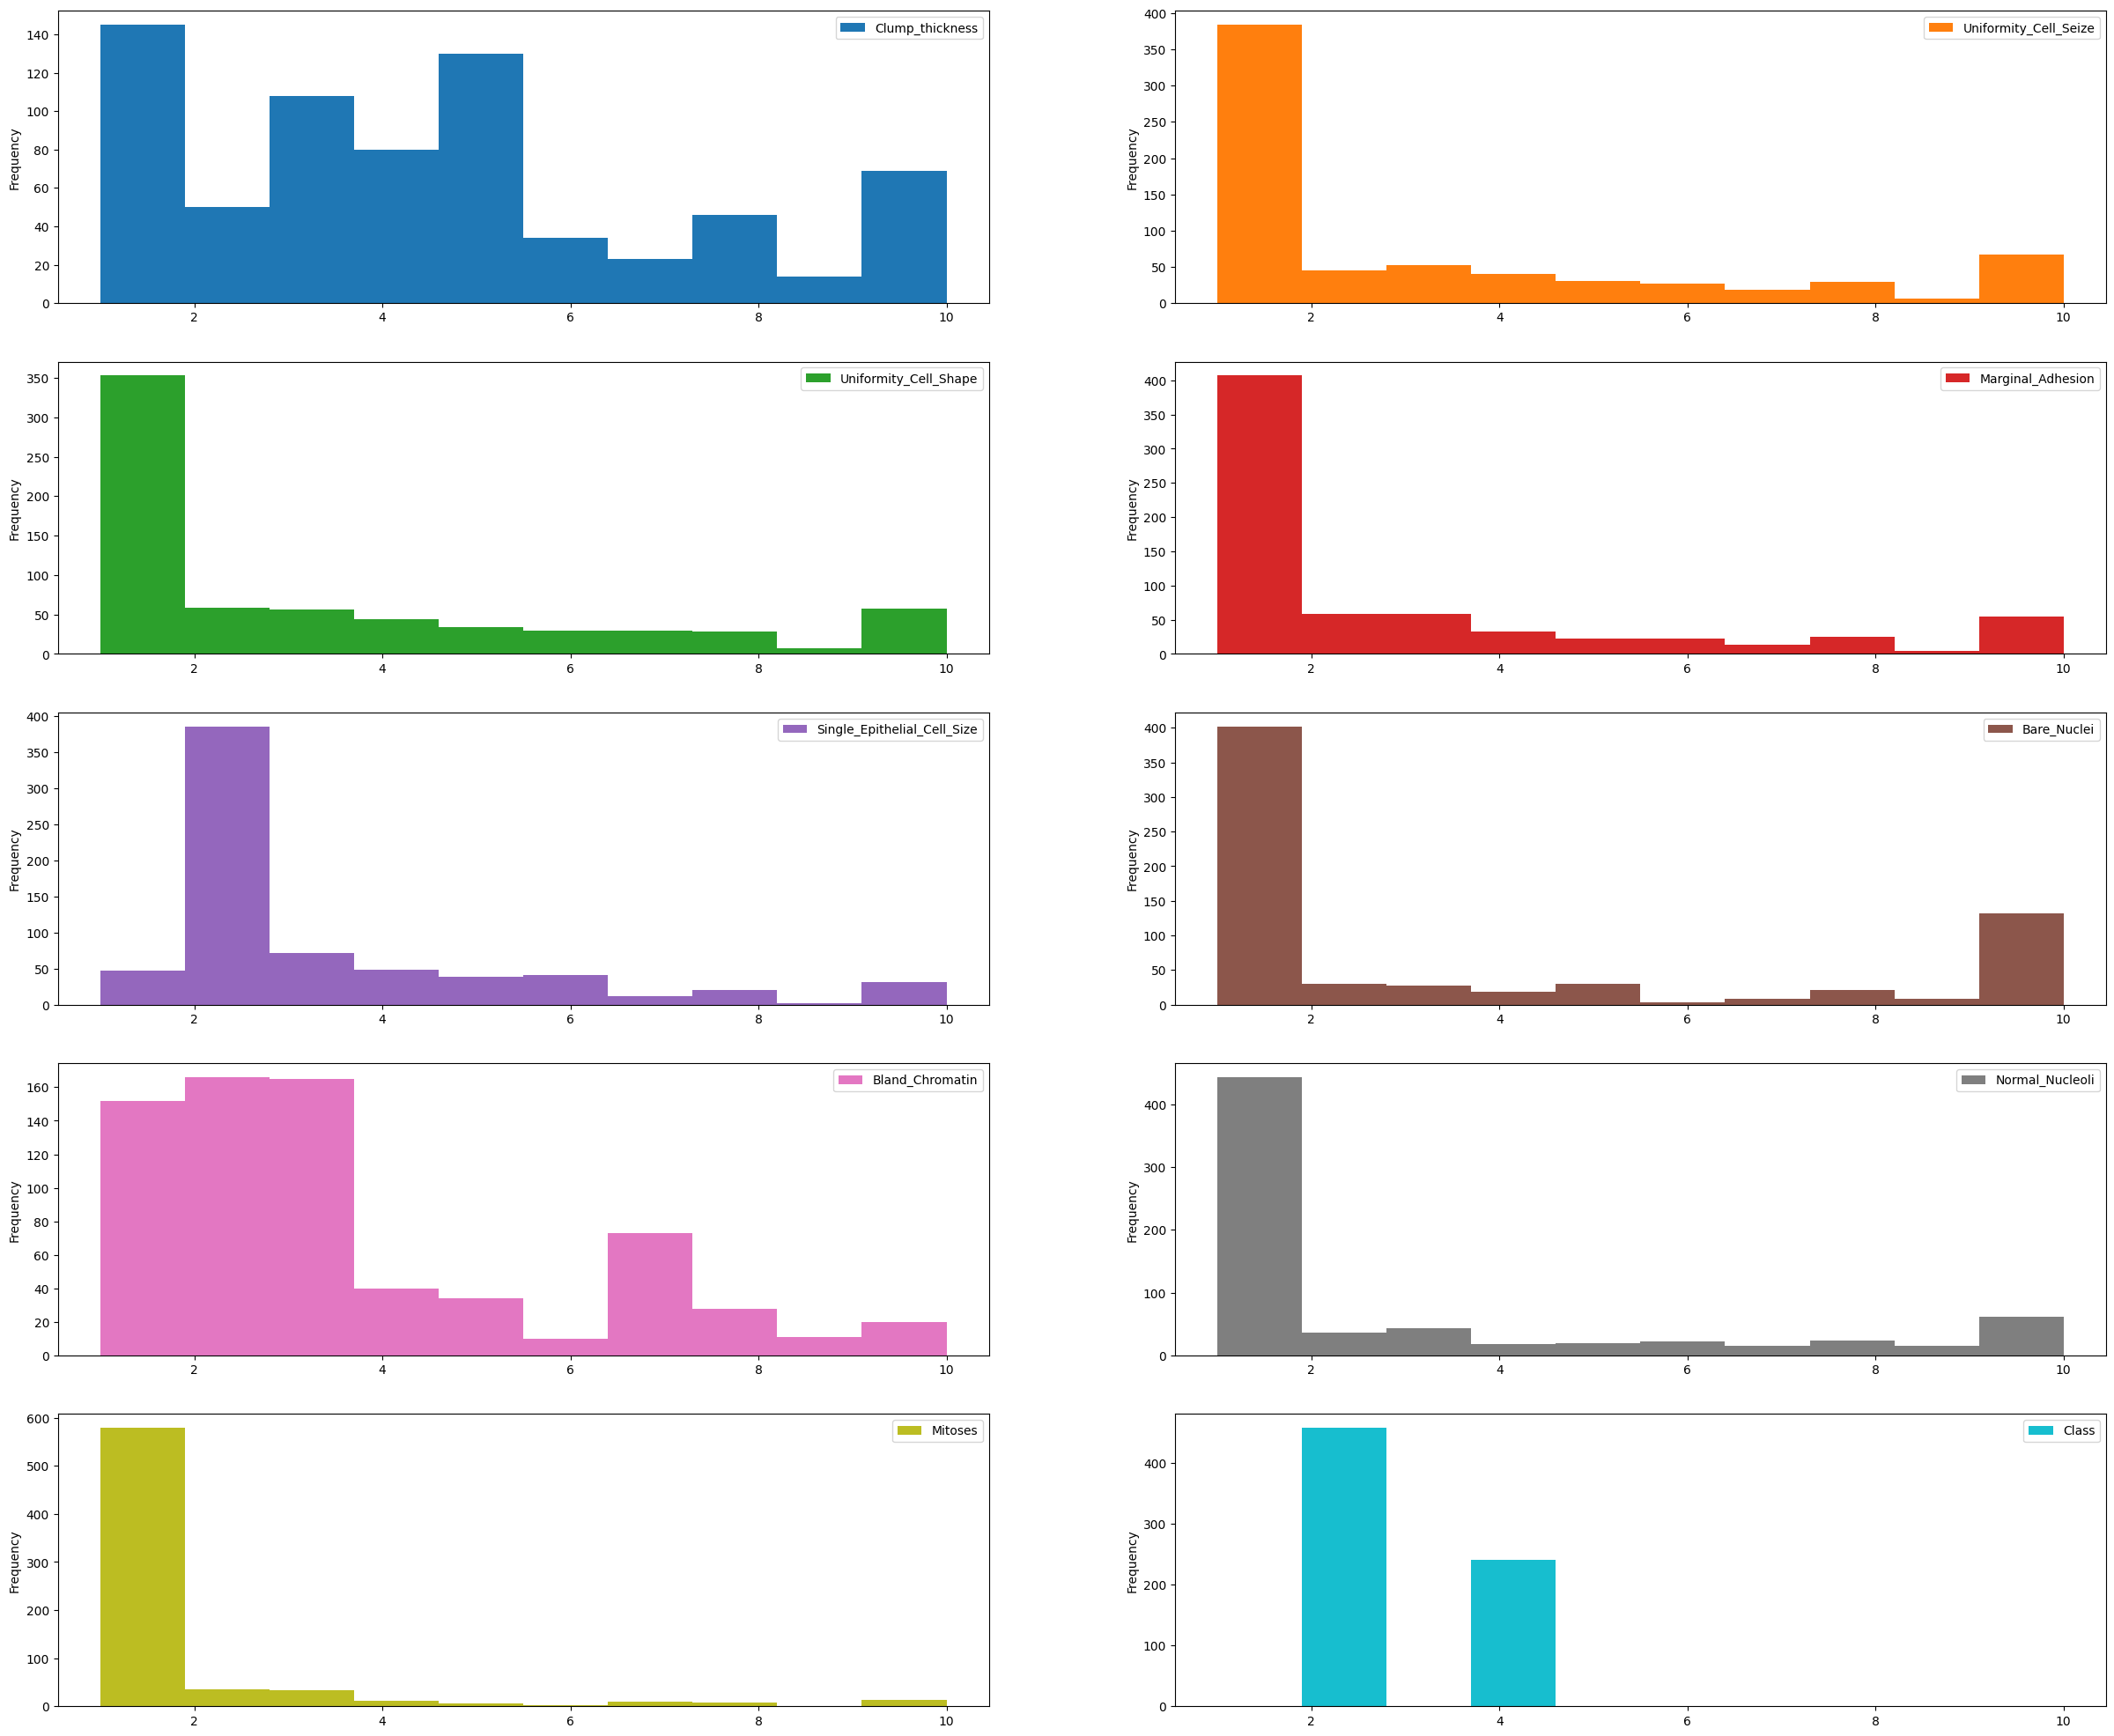

In [45]:
pl.rcParams['figure.figsize']=(30,25)
data.plot(kind='hist',bins=10,subplots=True,layout=(5,2),sharex=False,sharey=False)

In [46]:

correlation=data.corr()

In [47]:
correlation['Class'].sort_values(ascending=False)


Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Seize          0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

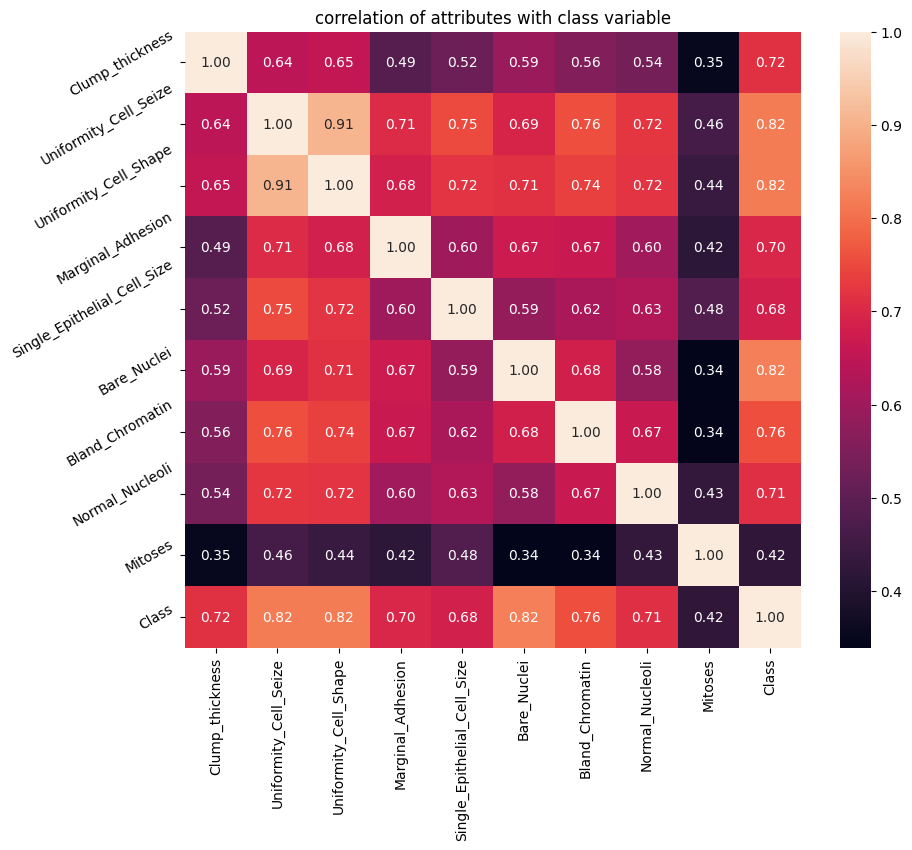

In [48]:
pl.figure(figsize=(10,8))
pl.title('correlation of attributes with class variable')
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
pl.show()

In [49]:
x=data.drop(['Class'],axis=1)
y=data['Class']

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
xtrain.shape,xtest.shape

((559, 9), (140, 9))

In [52]:
xtrain.dtypes

Clump_thickness                  int64
Uniformity_Cell_Seize            int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [53]:
xtrain.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Seize           0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [54]:
xtest.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Seize          0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [55]:
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col,round(xtrain[col].isnull().mean(),4))

Bare_Nuclei 0.0233


In [56]:
for data1 in [xtrain,xtest]:
    for col in xtrain.columns:
        colMedian=xtrain[col].median()
        data1[col].fillna(colMedian,inplace=True)

In [57]:
xtrain.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Seize          0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [58]:
xtest.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Seize          0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [59]:
xtrain.head()

,Clump_thickness,Uniformity_Cell_Seize,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [60]:
xtest.head()

,Clump_thickness,Uniformity_Cell_Seize,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


In [61]:
cols=xtrain.columns

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [63]:


xtrain=pd.DataFrame(xtrain,columns=[cols])

In [64]:
xtest=pd.DataFrame(xtest,columns=[cols])

In [65]:
xtrain.head()

,Clump_thickness,Uniformity_Cell_Seize,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [66]:
from tkinter import N
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [67]:
yPred=knn.predict(xtest)
yPred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [68]:
knn.predict_proba(xtest)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [69]:
knn.predict_proba(xtest)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [70]:
from sklearn.metrics import accuracy_score
print('model accuracy score: {0:0.4f}'.format(accuracy_score(ytest,yPred)))

model accuracy score: 0.9714


In [71]:
yPredTrain=knn.predict(xtrain)

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, yPredTrain)))

Training-set accuracy score: 0.9821


In [73]:
print('Training set score: {:.4f}'.format(knn.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(knn.score(xtest, ytest)))

Training set score: 0.9821
Test set score: 0.9714


In [74]:
ytest.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [75]:
null_accuracy=(85/(85+55))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


In [76]:
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(xtrain,ytrain)
yPred5=knn_5.predict(xtest)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(ytest,yPred5)))


Model accuracy score with k=5 : 0.9714


In [77]:
knn_6=KNeighborsClassifier(n_neighbors=6)
knn_6.fit(xtrain,ytrain)
yPred6=knn_6.predict(xtest)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(ytest,yPred6)))


Model accuracy score with k=5 : 0.9786


In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yPred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


<AxesSubplot:>

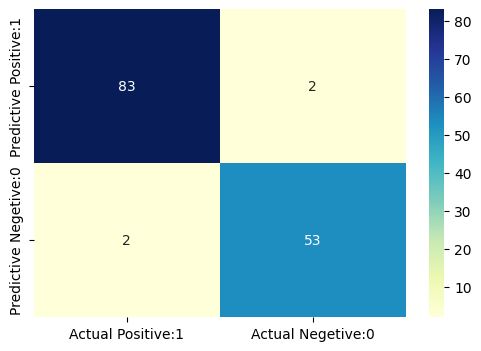

In [79]:
pl.figure(figsize=(6,4))
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negetive:0'],index=['Predictive Positive:1','Predictive Negetive:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [80]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yPred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [81]:
from cgi import print_arguments
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,xtrain,ytrain,cv=10,scoring='accuracy')
print('corss-validation scores:{}'.format(scores))

corss-validation scores:[0.89285714 0.96428571 0.94642857 0.96428571 0.96428571 0.94642857
 0.98214286 0.94642857 0.98214286 0.98181818]


In [82]:
print('average cross-validation score:{:.4f}'.format((scores.mean())))

average cross-validation score:0.9571
